In [26]:
import numpy as np
import pandas as pd
import os

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
airlines_data = pd.read_csv("../input/flight-delays/airlines.csv")
airport_data = pd.read_csv("../input/flight-delays/airports.csv")
flights_data = pd.read_csv("../input/flight-delays/flights.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
airlines_data.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [30]:
airport_data.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [31]:
flights_data['DEPARTURE_DELAY'].max()

1988.0

In [32]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
flights_data.shape

(5819079, 31)

In [34]:
flights_seg = flights_data[0:150000]
flights_seg

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2015,1,10,6,EV,4607,N15572,XNA,IAH,1504,...,1735.0,46.0,0,0,NaN,0.0,0.0,0.0,46.0,0.0
149996,2015,1,10,6,WN,4388,N7723E,ATL,DAL,1505,...,1623.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
149997,2015,1,10,6,WN,2903,N218WN,ATL,DCA,1505,...,1634.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
149998,2015,1,10,6,WN,4519,N436WN,ATL,MCO,1505,...,1627.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
flights_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 150000 non-null  int64  
 1   MONTH                150000 non-null  int64  
 2   DAY                  150000 non-null  int64  
 3   DAY_OF_WEEK          150000 non-null  int64  
 4   AIRLINE              150000 non-null  object 
 5   FLIGHT_NUMBER        150000 non-null  int64  
 6   TAIL_NUMBER          149693 non-null  object 
 7   ORIGIN_AIRPORT       150000 non-null  object 
 8   DESTINATION_AIRPORT  150000 non-null  object 
 9   SCHEDULED_DEPARTURE  150000 non-null  int64  
 10  DEPARTURE_TIME       146099 non-null  float64
 11  DEPARTURE_DELAY      146099 non-null  float64
 12  TAXI_OUT             145976 non-null  float64
 13  WHEELS_OFF           145976 non-null  float64
 14  SCHEDULED_TIME       150000 non-null  float64
 15  ELAPSED_TIME     

In [36]:
delay =[]
for row in flights_seg['ARRIVAL_DELAY']:
    if row > 60:
        delay.append(3)
    elif row > 30:
        delay.append(2)
    elif row > 15:
        delay.append(1)
    else:
        delay.append(0)  
flights_seg['delay'] = delay

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [37]:
# 0 = On time/ before time/ not more than 15 mins of delay
# 1 = more than 15 mins and less than 30 mins of delay
# 2 = more than 30 mins and less than 1 hr of delay
# 3 = more than an hour of delay
flights_seg.value_counts('delay')

delay
0    104480
1     15460
3     15397
2     14663
dtype: int64

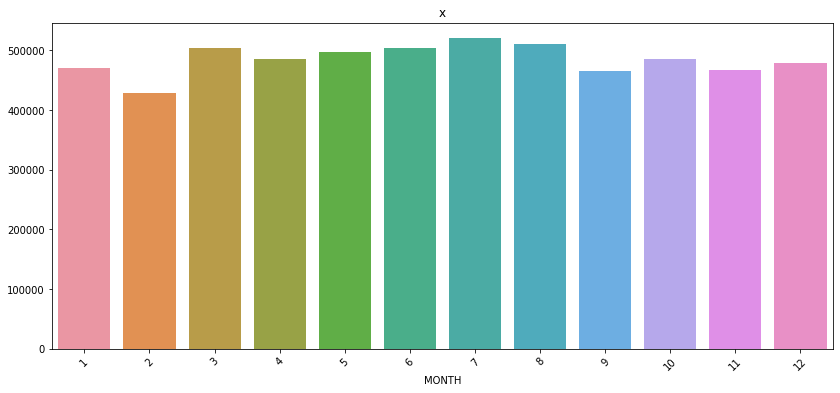

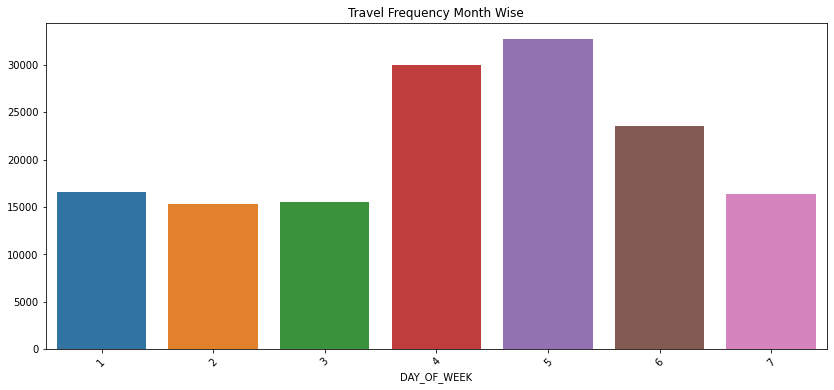

In [38]:
def plot_bar(group, title):
    plt.figure(figsize=(14,6))
    sns.barplot(x=group.index,y=group.values)     
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
plot_bar(flights_data.value_counts('MONTH'), 'x')
plot_bar(flights_seg.value_counts('DAY_OF_WEEK'), 'Travel Frequency Month Wise')

In [39]:
Flight_data_delay =[]
for row in flights_data['ARRIVAL_DELAY']:
    if row > 60:
        Flight_data_delay.append(3)
    elif row > 30:
        Flight_data_delay.append(2)
    elif row > 15:
        Flight_data_delay.append(1)
    else:
        Flight_data_delay.append(0)  


In [40]:
flights_data['Delay'] = Flight_data_delay

<AxesSubplot:>

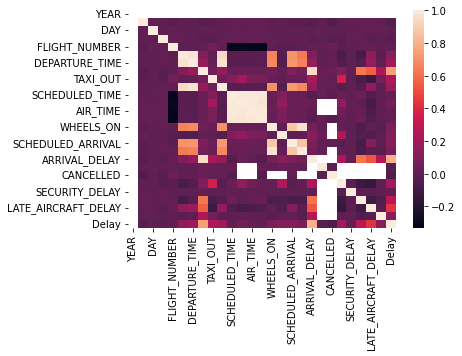

In [41]:
sns.heatmap(flights_data.corr())

In [42]:
flights_data=flights_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', "CANCELLED"],
                                             axis=1)

In [43]:
flights_data.describe()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Delay
count,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.819079e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,5.819079e+06
mean,6.524085e+00,1.570459e+01,3.926941e+00,1.329602e+03,9.370158e+00,8.223565e+02,1.493808e+03,2.609863e-03,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00,3.394501e-01
std,3.405137e+00,8.783425e+00,1.988845e+00,4.837518e+02,3.708094e+01,6.077843e+02,5.071647e+02,5.102012e-02,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01,8.130325e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,2.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,9.170000e+02,-5.000000e+00,3.730000e+02,1.110000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,-2.000000e+00,6.470000e+02,1.520000e+03,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.730000e+03,7.000000e+00,1.062000e+03,1.918000e+03,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00,0.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,1.988000e+03,4.983000e+03,2.400000e+03,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03,3.000000e+00


In [44]:
flights_data=flights_data.dropna()

In [45]:
flights_data.head(25)

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Delay
27,1,1,4,115,12.0,1487,542,0,25.0,0.0,0.0,0.0,0.0,1
30,1,1,4,125,72.0,1440,549,0,43.0,0.0,0.0,0.0,0.0,2
35,1,1,4,145,0.0,2762,555,0,0.0,0.0,15.0,0.0,0.0,0
50,1,1,4,307,-3.0,1129,500,0,20.0,0.0,0.0,0.0,0.0,1
52,1,1,4,400,95.0,1189,605,0,0.0,0.0,85.0,0.0,0.0,3
55,1,1,4,438,72.0,1666,739,0,17.0,0.0,72.0,0.0,0.0,3
70,1,1,4,515,108.0,1121,856,0,0.0,0.0,0.0,0.0,102.0,3
73,1,1,4,520,60.0,1009,850,0,0.0,0.0,60.0,0.0,0.0,2
74,1,1,4,520,58.0,964,841,0,0.0,0.0,54.0,0.0,0.0,2
86,1,1,4,530,53.0,641,835,0,13.0,0.0,53.0,0.0,0.0,3


<AxesSubplot:>

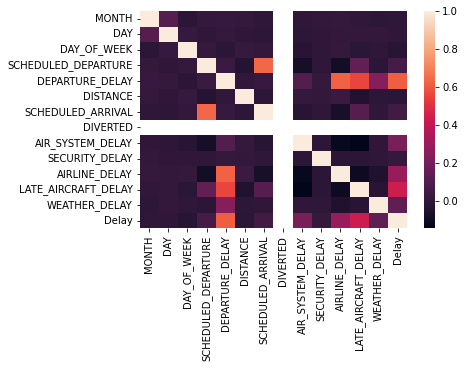

In [46]:
sns.heatmap(flights_data.corr())

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [48]:
data = flights_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [49]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [50]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [51]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [52]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')
auc_score

0.9962012341392916